<a href="https://colab.research.google.com/github/hanseojin22/yolov8/blob/main/yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

욜로v8 라이브러리 설치

In [ ]:
pip install ultralytics#step 1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 42.5 MB/s eta 0:00:00


In [15]:
from ultralytics import YOLO

# YOLOv8 모델 로드 step 2
model = YOLO('yolov8n.pt')  # 또는 학습된 모델 경로

# 이미지 URL 지정 step 3
image_url = 'https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202205/21/1200738c-61c0-4a51-83c4-331f53d4dcdc.jpg'

# 이미지 URL로 예측 수행 step 4
results = model(image_url)

# 결과 시각화 (선택사항) step 5
result_image = results[0].plot()

# 결과 이미지 저장 (선택사항) step 6
from PIL import Image
Image.fromarray(result_image).save('result.jpg')





Found https://pds.joongang.co.kr/news/component/htmlphoto_mmdata/202205/21/1200738c-61c0-4a51-83c4-331f53d4dcdc.jpg locally at 1200738c-61c0-4a51-83c4-331f53d4dcdc.jpg
image 1/1 /content/1200738c-61c0-4a51-83c4-331f53d4dcdc.jpg: 448x640 7 persons, 1 bicycle, 7 cars, 259.5ms
Speed: 4.5ms preprocess, 259.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)


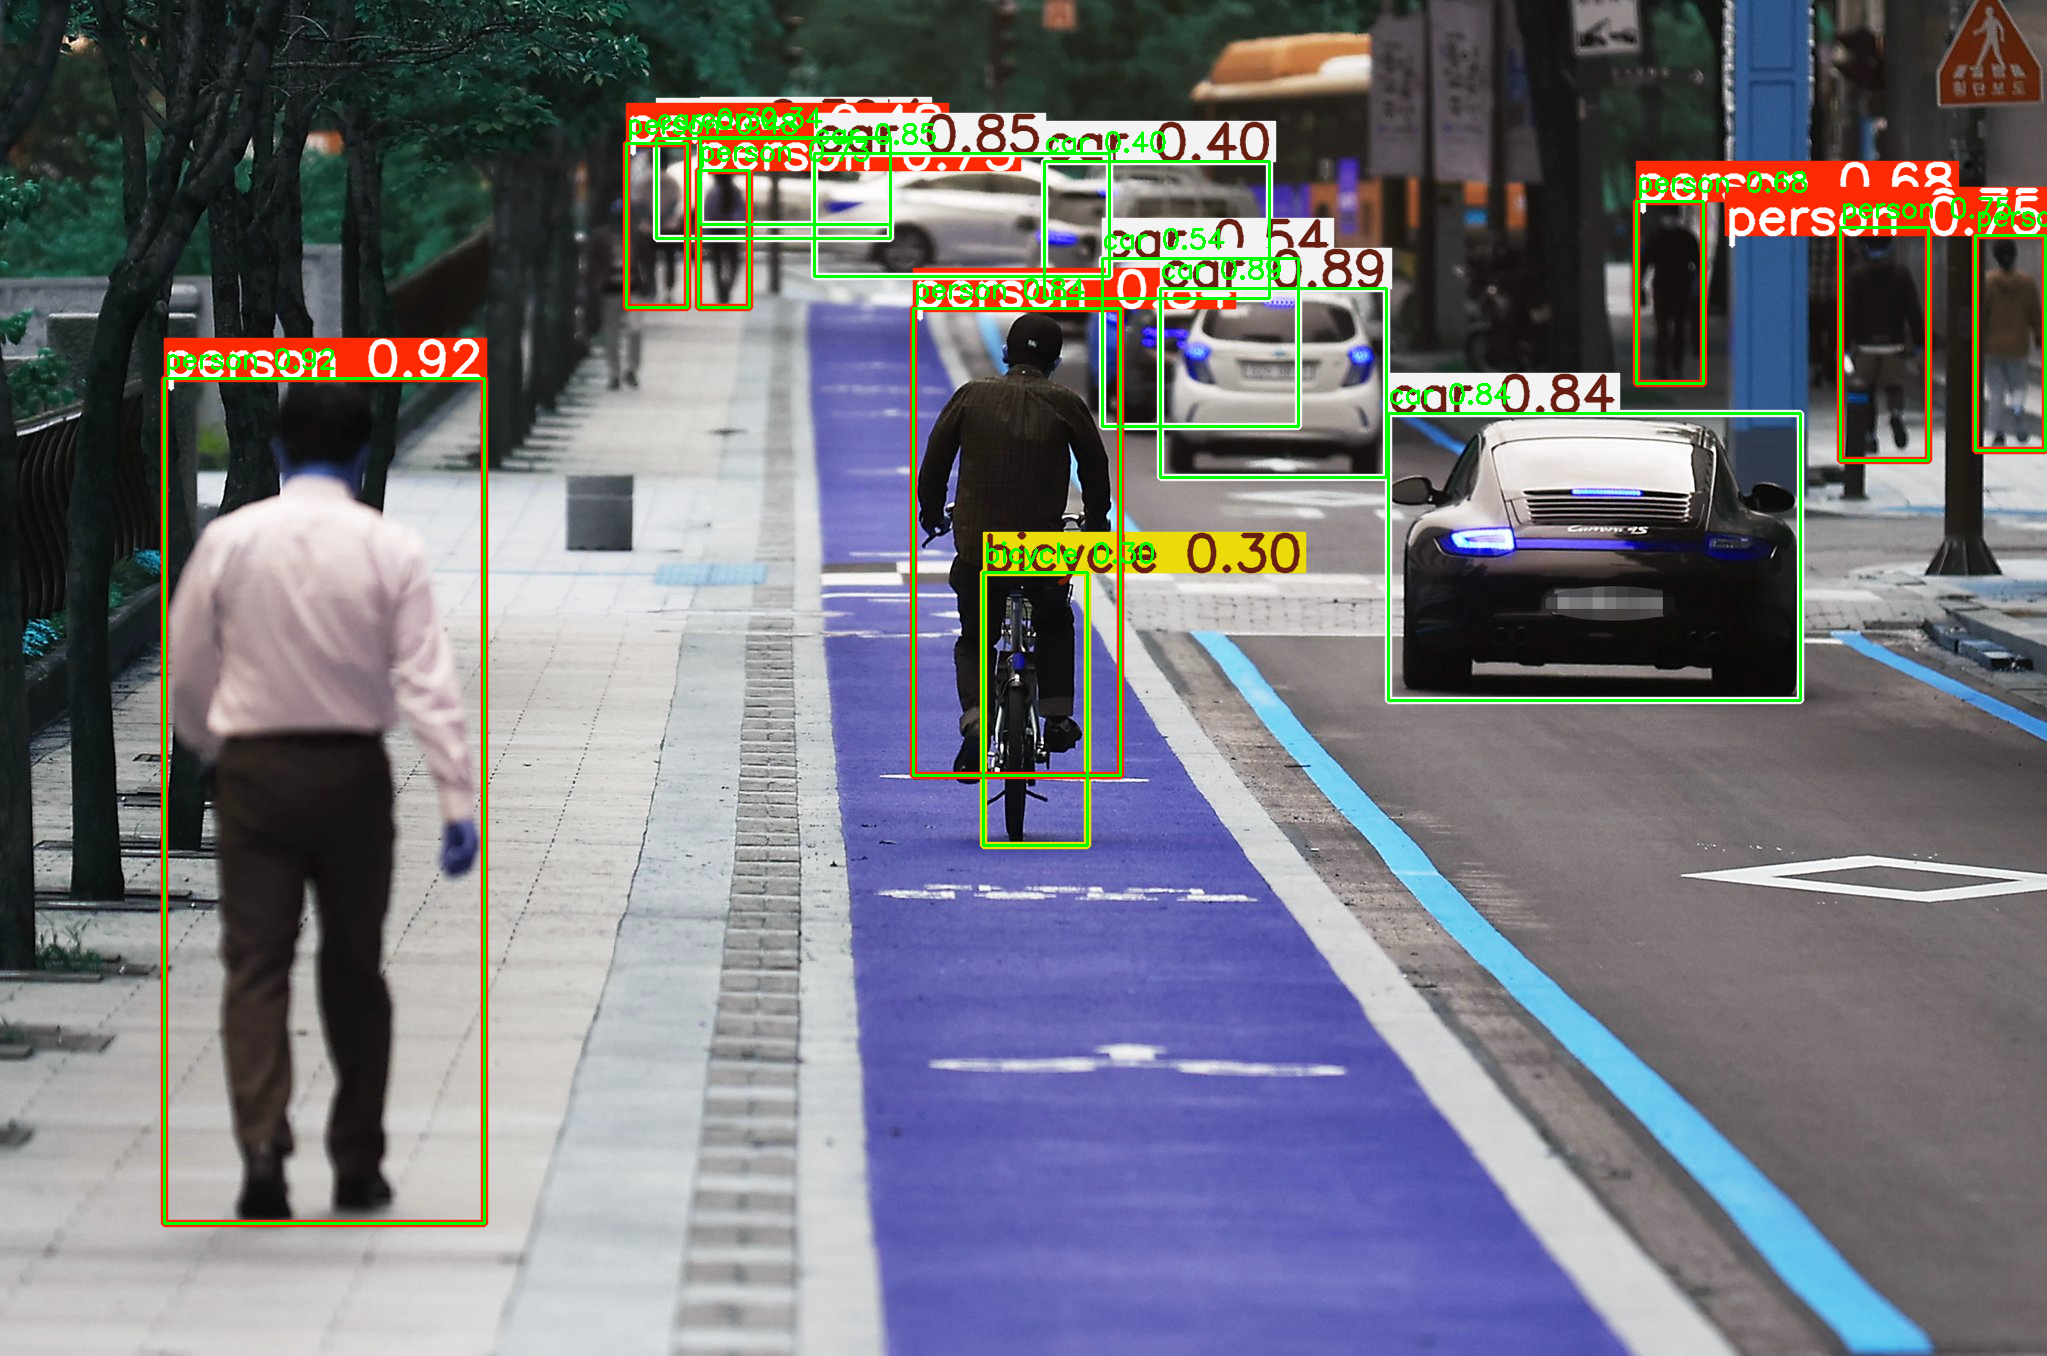

In [16]:
import cv2
import numpy as np

# 결과 이미지를 OpenCV 형식으로 변환 step 7
cv_image = cv2.cvtColor(np.array(result_image), cv2.COLOR_RGB2BGR)

# 감지된 객체들에 대한 정보 추출 및 표시 step 8
for r in results:
    boxes = r.boxes
    for box in boxes:
        # 바운딩 박스 좌표 step 9
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # 클래스 및 신뢰도 step 10
        cls = int(box.cls[0])
        conf = float(box.conf[0])

        # 클래스 이름 (모델의 클래스 목록에 따라 수정 필요) step 11
        class_names = model.names
        label = f"{class_names[cls]} {conf:.2f}"

        # 바운딩 박스 그리기 step 12
        cv2.rectangle(cv_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # 라벨 표시 step 13
        cv2.putText(cv_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# 결과 이미지 저장 step 14
cv2.imwrite('result_with_labels.jpg', cv_image)

# 결과 표시 step 15
from google.colab.patches import cv2_imshow
cv2_imshow(cv_image)



from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
import urllib.request



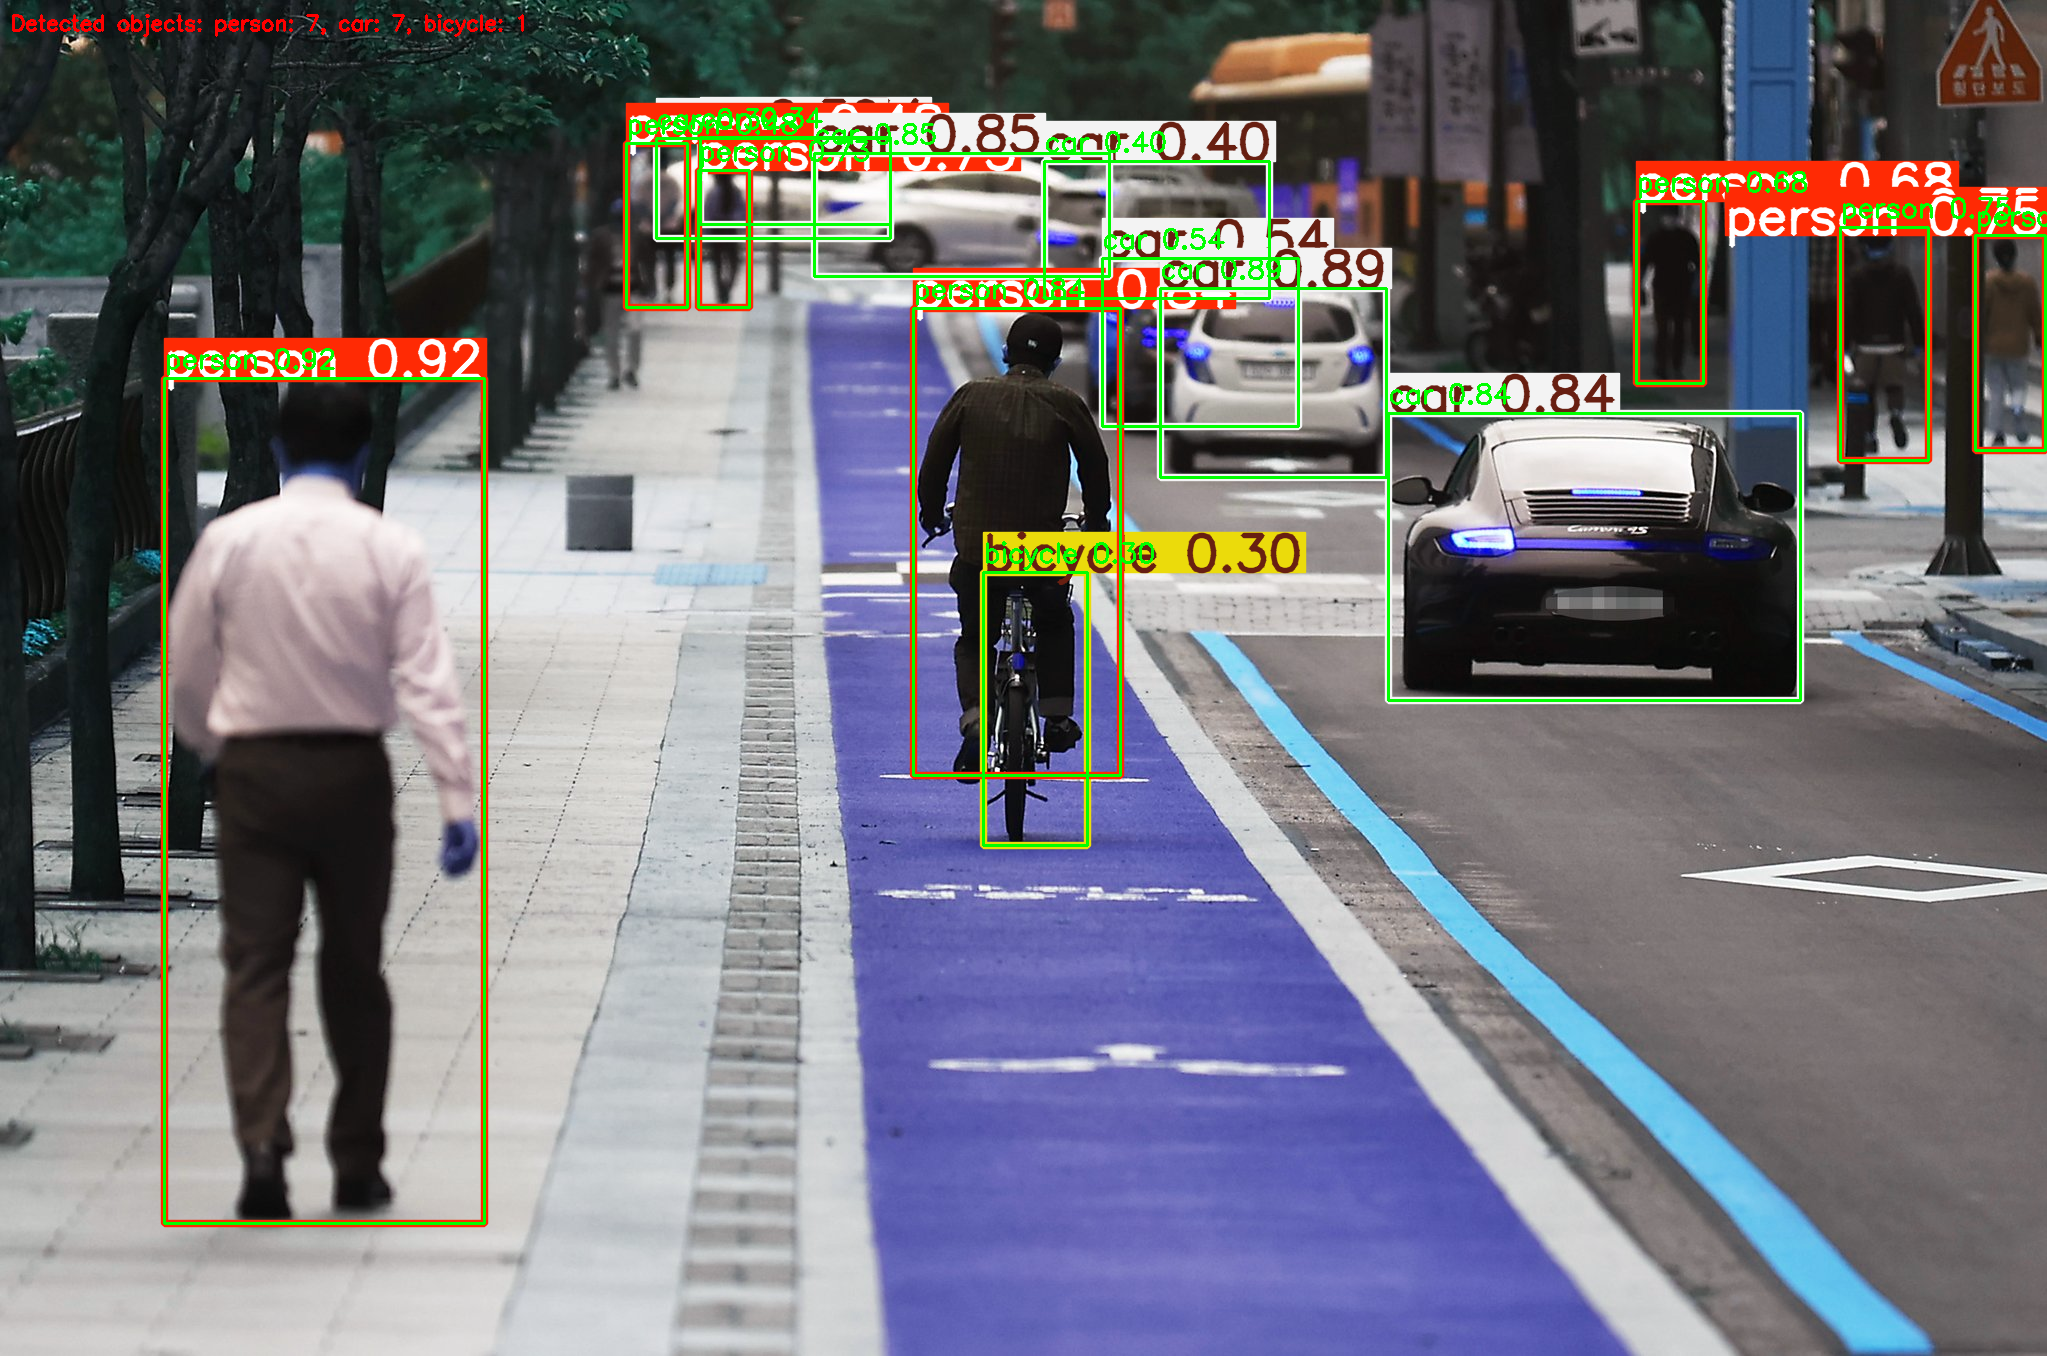

In [17]:
import cv2
import numpy as np
from collections import Counter

# 결과 이미지를 OpenCV 형식으로 변환
cv_image = cv2.cvtColor(np.array(result_image), cv2.COLOR_RGB2BGR)

# 객체 카운터 초기화
object_counter = Counter()

# 감지된 객체들에 대한 정보 추출 및 표시
for r in results:
    boxes = r.boxes
    for box in boxes:
        # 바운딩 박스 좌표
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # 클래스 및 신뢰도
        cls = int(box.cls[0])
        conf = float(box.conf[0])

        # 클래스 이름
        class_names = model.names
        label = f"{class_names[cls]} {conf:.2f}"

        # 객체 카운트 증가
        object_counter[class_names[cls]] += 1

        # 바운딩 박스 그리기
        cv2.rectangle(cv_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # 라벨 표시
        cv2.putText(cv_image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# 객체 갯수 텍스트 생성
count_text = "Detected objects: " + ", ".join([f"{k}: {v}" for k, v in object_counter.items()])

# 이미지 상단에 객체 갯수 표시
cv2.putText(cv_image, count_text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# 결과 이미지 저장
cv2.imwrite('result_with_labels_and_count.jpg', cv_image)

# 결과 표시
from google.colab.patches import cv2_imshow
cv2_imshow(cv_image)
